# Assignment 5: IMDB review sample Classification with fast.ai Deep Learning Framework

**Question 1: (10 points)**

Export the sample data set you created in [Classwork 3](https://colab.research.google.com/drive/1be7ksupqRkdjU1fZUAS37F5GiLCkFzkR) with pickle library, name it `imdb-sample.pickle`, and upload it to Google Colab. Then run the following codes.

In [15]:
from fastai.text import *
path = Path('.')
with open('imdb-sample.pickle', 'rb') as f:
    train, valid = pickle.load(f)
valid.tail()
#In my file sentences are in random order so the output is different from the given output.

,text,sentiment
995,Saw this on French TV today and was most disap...,0
996,It would be wrong and reprehensible of me to a...,0
997,caddyshack II does NO justice for the caddysac...,0
998,I absolutely love stand-up comedy. I love to h...,0
999,<br /><br />**********SPOILER ALERT***********...,0


You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-11-10-085256.png)

**Question 2: (10 points)**

Create a TextLMDataBunch instance called `data_lm`, load your train and valid Dataframe into it, and run the following code.

In [0]:
data_lm = TextLMDataBunch.from_df(path=path, train_df=train , valid_df=valid, text_cols=0, label_cols=1 )

In [4]:
data_lm.show_batch()

idx,text
0,"very moment . xxmaj mary xxmaj xxunk , who i seem to remember from xxup snl or some other xxup tv comedy skit show , is the evil wife , and xxmaj larry xxmaj drake plays the lunatic in the xxunk xxmaj santa outfit . i had forgotten xxmaj santa was played by xxmaj drake over the years . xxmaj his xxmaj santa is an unstoppable force and quite"
1,"these days . \n \n i understand it 's a movie and that 's why i accept it as a funny situation . xxmaj plus , the humor is versatile . xxmaj there are moments involving xxup xxunk , funny lines with xxmaj chabat 's best friend , some lesbian references , funny situations involving the family women , and more . \n \n xxmaj charlotte xxmaj xxunk"
2,"xxmaj chocolat before my viewing of it . i did n't know anything about the story , the cast , the director , or anything about the film 's history . xxmaj all i knew was it was a highly - acclaimed xxmaj french film . xxmaj had i known more , i probably would n't have viewed the picture with an open mind . xxmaj on paper ,"
3,"xxunk xxmaj digital xxunk xxmaj surround xxmaj sound . xxup dvd also an jam session with xxmaj sandler & xxmaj cheadle , an featurette , photo montage and previews . i was expecting more for the xxup dvd features like an audio commentary track by the director and deleted scenes . "" xxmaj reign xxmaj over xxmaj me "" is certainly one of the best films that came out"
4,"his stuntmen were injured during this movie that nobody would insure them anymore - xxmaj jackie had to take responsibility himself . xxmaj there are no gimmicks , wires or stand - ins - it is all true - life action that is a treat to watch . xxmaj it is this type of action that made him the phenomenon that he is and it is a movie that"


You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-14-25-459713.png)

**Question 3: (10 points)**

Create a `language_model_learner` named `learn`, use `data_lm` as input data, `AWD_LSTM` as architecture, and choose 0.5 as Dropout rate. Draw the result of learning rate finder.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


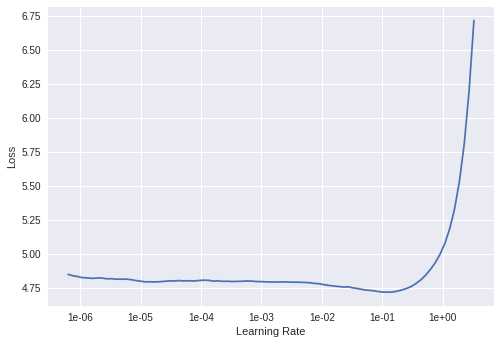

In [5]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
learn.lr_find()
learn.recorder.plot(skip_end=5)


You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-17-47-701082.png)

**Question 4: (20 points)**

Fit one cycle with your language learner (`learn`), unfreeze it and fit another 3 cycles. Save the language learner's encoder as `ft_enc`.

In [6]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn.save('fit_head')
learn.load('fit_head');
learn.unfreeze()
learn.fit_one_cycle(3, 1e-3, moms=(0.8,0.7))
learn.save('fine_tuned')
learn.load('fine_tuned')
learn.save_encoder('ft_enc')



epoch,train_loss,valid_loss,accuracy,time
0,4.450438,3.990702,0.284724,01:02


epoch,train_loss,valid_loss,accuracy,time
0,4.116813,3.925055,0.290946,01:15
1,3.986373,3.878154,0.296293,01:15
2,3.844938,3.867844,0.297140,01:15


You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-20-09-953060.png)

**Question 5: (10 points)**

Create a TextClasDataBunch instance called `data_clas`, load your train and valid Dataframe into it, use the vocab from `data_lm.train_ds.vocab`, set batch size as 32, and run the following code.

In [0]:
data_clas = TextClasDataBunch.from_df(path, train_df=train, valid_df=valid, text_cols=0, label_cols=1)

In [8]:
data_clas.show_batch()

text,target
"xxbos xxmaj the freedom of having your own xxmaj sea xxmaj going xxmaj power xxmaj boat , the excitement of going on underwater adventures a rugged , an 's man of an adventurer and xxunk so well endowed ! ) xxunk in fine xxmaj bikinis were all definite selling points for "" xxup sea xxup xxunk - 61 ) . \n \n xxmaj just what was the reason for",1
"xxbos i have never seen any of xxmaj spike xxmaj lee 's prior films , as their trailers never caught my interest . i have seen , and admire xxmaj denzel xxmaj washington , and xxmaj jodie xxmaj foster 's work , and have several of their dvds . i was , however , entirely disappointed with this movie . xxmaj if this film is any indication of xxmaj spike",0
"xxbos xxmaj to be a xxmaj buster xxmaj keaton fan is to have your heart broken on a regular basis . xxmaj most of us first encounter xxmaj keaton in one of the brilliant feature films from his great period of independent production : ' xxmaj the xxmaj general ' , ' xxmaj the xxmaj xxunk ' , ' xxmaj sherlock xxmaj jnr ' . xxmaj we recognise him as",0
"xxbos xxup oliver xxup twist was to have controversy as well as success following it after xxmaj dickens published it in xxunk . xxmaj his picture of life in the urban ghettos was something shocking and new , and his making the central figures of the novel include criminals was another innovation . \n \n xxmaj one day he was walking in xxmaj london and passed a young woman",1
"xxbos xxmaj the movie "" macarthur "" begins and ends at xxmaj gen. xxmaj douglas macarthur 's , xxmaj gregory xxmaj peck , xxmaj xxunk xxmaj mata the xxup us xxmaj military xxmaj academy of xxmaj west xxmaj point on the xxmaj hudson . xxmaj we see a frail 82 year old xxmaj xxunk . macarthur give the commencement speech to the xxunk class of 1962 about what an honor",1


You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-24-53-893234.png)

**Question 6: (10 points)**

Create a `text_classifier_learner` named `learn`, use `data_clas` as input data, `AWD_LSTM` as architecture, and choose 0.5 as Dropout rate. Note to compare the result with Scikit-learn and textblob later, you need to make sure Precision and Recall are in the metrics list. Load the encoder  (`ft_enc`) you saved just now into `learn`. Draw the result of learning rate finder.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


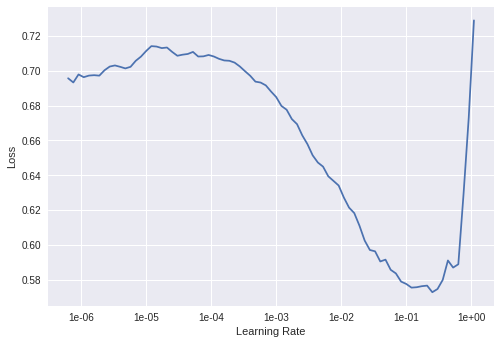

In [9]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')
learn.lr_find()
learn.recorder.plot(skip_end=5)

You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-27-55-239469.png)

**Question 7: (20 points)**

Fit one cycle with your text classifier learner (`learn`). Unfreeze the last two layers, and fit 3 cycles. Then unfreeze it totally, and fit another 2 cycles. Show the training result.

In [10]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn.save('fit_head')
learn.load('fit_head');
learn.unfreeze()
learn.fit_one_cycle(3, 1e-3, moms=(0.8,0.7))
learn.save('fine_tuned')
learn.load('fine_tuned')
learn.save_encoder('result')
learn.unfreeze()
learn.fit_one_cycle(2, 1e-3, moms=(0.8,0.7))
learn.save('fine_tuned')
learn.load('fine_tuned')
learn.save_encoder('result')


epoch,train_loss,valid_loss,accuracy,time
0,0.521577,0.512838,0.782000,00:40


epoch,train_loss,valid_loss,accuracy,time


RuntimeError: ignored

You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-31-32-631875.png)

**Question 8: (10 points)**

Comparing the result with those from textblob, scikit-learn in Classwork 3, what is your finding? How about comparing with the result from Self-study 7 (the whole IMDB dataset)? Write down your answer and comments.

*Your answer here:*



In [0]:
The TextBlob had the most low rates and FastAI had the most elevated rates. FastAI is the better model. FastAI even would be advised to review rates. Therefore, the outcome has lower accuracy than the outcome from IMDB informational index.
